In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read data in pandas dataframe
df =  pd.read_csv('C:/NYU/第二学期/UDS/final/train.csv', nrows = 2_000_000, parse_dates=["pickup_datetime"])

# list first few rows (datapoints)
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [3]:
df.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [4]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+06,2.000000e+06,2.000000e+06,1.999986e+06,1.999986e+06,2.000000e+06
mean,1.134779e+01,-7.252321e+01,3.992963e+01,-7.252395e+01,3.992808e+01,1.684113e+00
std,9.852883e+00,1.286804e+01,7.983352e+00,1.277497e+01,1.032382e+01,1.314982e+00
min,-6.200000e+01,-3.377681e+03,-3.458665e+03,-3.383297e+03,-3.461541e+03,0.000000e+00
25%,6.000000e+00,-7.399208e+01,4.073491e+01,-7.399141e+01,4.073400e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075312e+01,1.000000e+00
75%,1.250000e+01,-7.396713e+01,4.076710e+01,-7.396369e+01,4.076809e+01,2.000000e+00
max,1.273310e+03,2.856442e+03,2.621628e+03,3.414307e+03,3.345917e+03,2.080000e+02


In [5]:
df = df.dropna(how = 'any', axis = 'rows')

In [6]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])

In [7]:
df['year']=df['pickup_datetime'].dt.year
df['month']=df['pickup_datetime'].dt.month
df['dow']=df['pickup_datetime'].dt.weekday
df['date']=df['pickup_datetime'].dt.date

In [36]:
h = 0.000002 

fare_array=np.array(df['fare_amount'])
xx, yy = np.meshgrid(np.arange(lonmin, lonmax, h),
                     np.arange(latmin, latmax, h))
plt.figure(figsize=(18, 18))
fare_array = fare_array.reshape((xx.shape[0], xx.shape[1]))
plt.imshow(fare_array, extent=(lonmin, lonmax, latmin, latmax), origin="lower")

MemoryError: Unable to allocate 528. GiB for an array with shape (225001, 315000) and data type float64

In [33]:
len(xx)

23

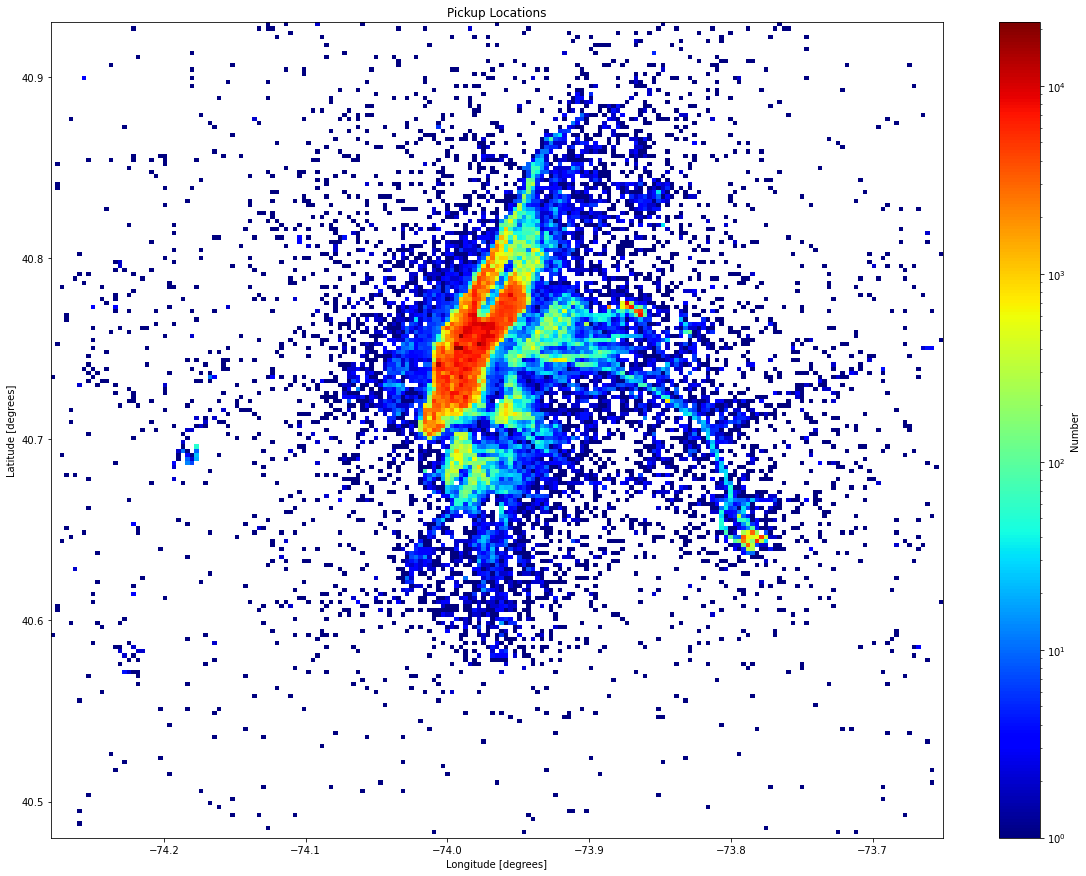

In [8]:
#latmin = 40.58
#lonmin = -74.05
#latmax = 40.88
#lonmax = -73.90
latmin = 40.48
lonmin = -74.28
latmax = 40.93
lonmax = -73.65
ratio = np.cos(40.7 * np.pi/180) * (lonmax-lonmin) /(latmax-latmin)
from matplotlib.colors import LogNorm
fig = plt.figure(1, figsize=(20,15) )
hist = plt.hist2d(df.pickup_longitude,df.pickup_latitude,bins=199,range=[[lonmin,lonmax],[latmin,latmax]],norm=LogNorm(),cmap=plt.cm.jet)
plt.xlabel('Longitude [degrees]')
plt.ylabel('Latitude [degrees]')
plt.title('Pickup Locations')
plt.colorbar(label='Number')
plt.show()

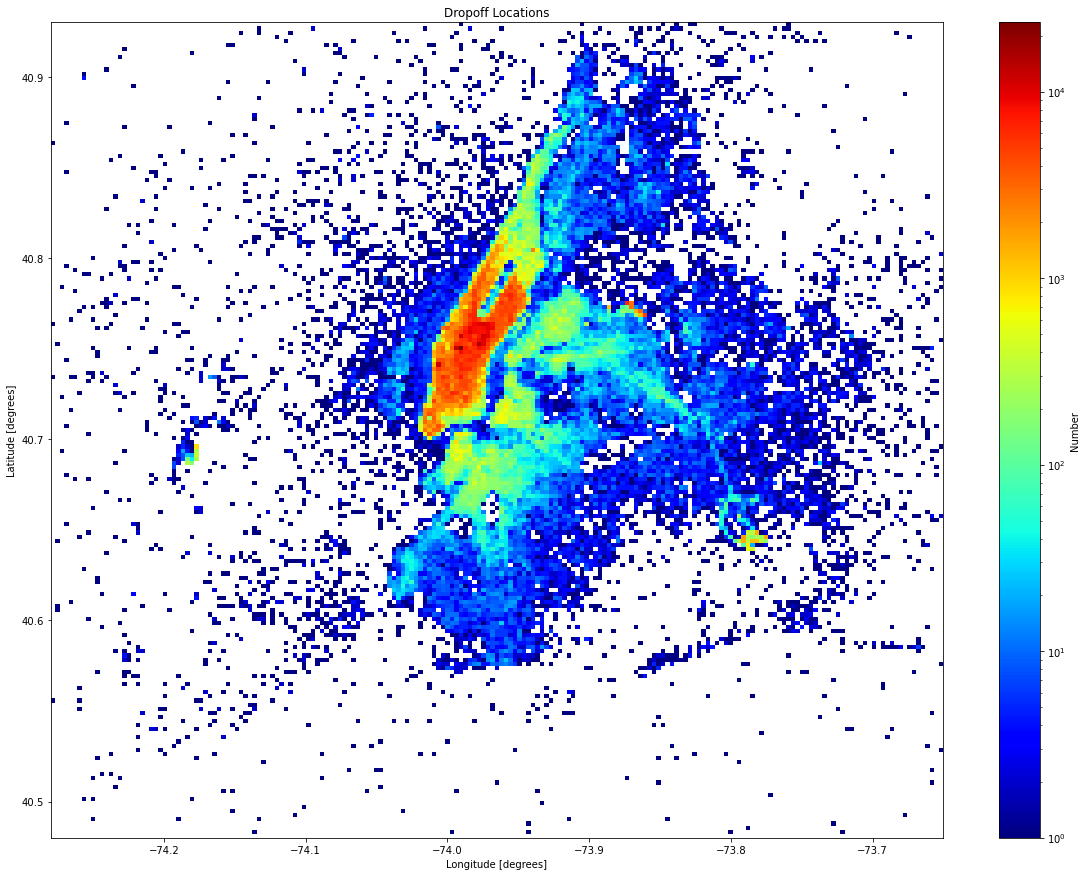

In [9]:
fig = plt.figure(1, figsize=(20,15) )
hist = plt.hist2d(df.dropoff_longitude,df.dropoff_latitude,bins=199,range=[[lonmin,lonmax],[latmin,latmax]],norm=LogNorm(),cmap=plt.cm.jet)
plt.xlabel('Longitude [degrees]')
plt.ylabel('Latitude [degrees]')
plt.title('Dropoff Locations')
plt.colorbar(label='Number')
plt.show()

In [10]:
#fare distribution
fare5=df[df['fare_amount']<=5]
fare10=df[(df['fare_amount']>5) & (df['fare_amount']<=15)]
fare20=df[df['fare_amount']>20]

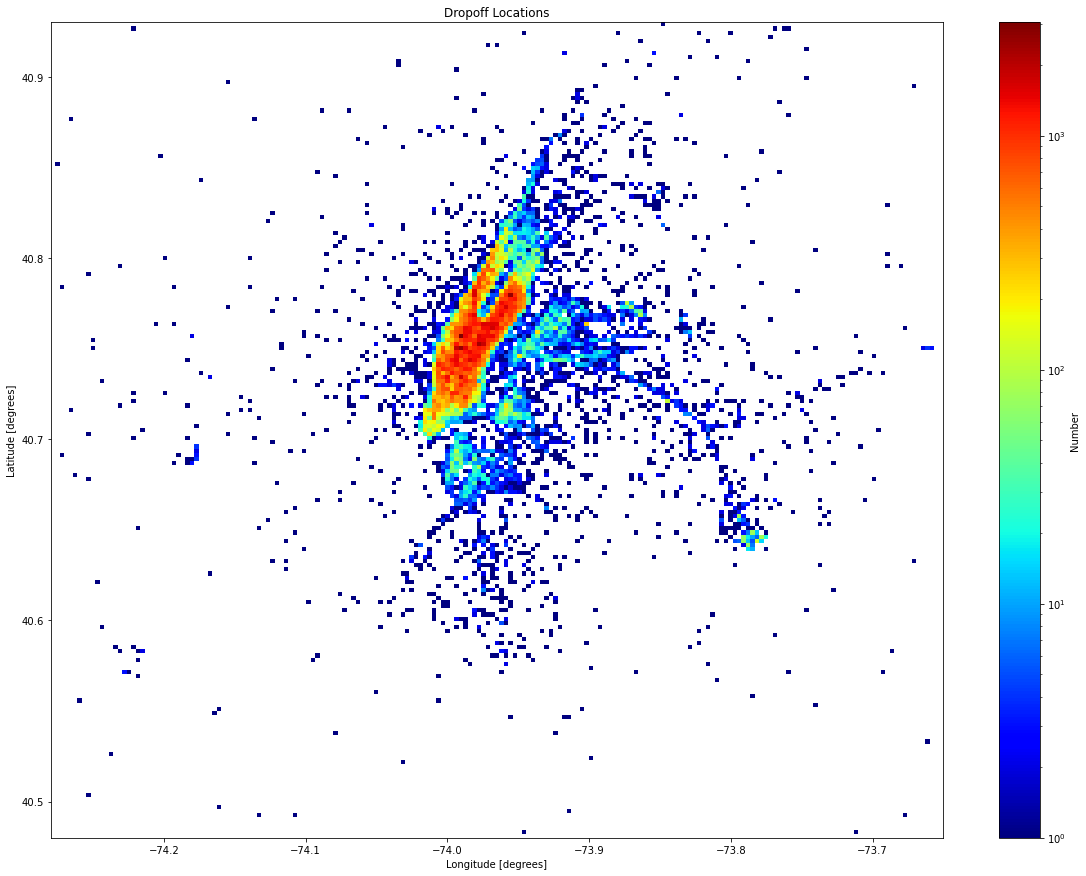

In [11]:
fig = plt.figure(1, figsize=(20,15) )
hist = plt.hist2d(fare5.pickup_longitude,fare5.pickup_latitude,bins=199,range=[[lonmin,lonmax],[latmin,latmax]],norm=LogNorm(),cmap=plt.cm.jet)
plt.xlabel('Longitude [degrees]')
plt.ylabel('Latitude [degrees]')
plt.title('Dropoff Locations')
plt.colorbar(label='Number')
plt.show()

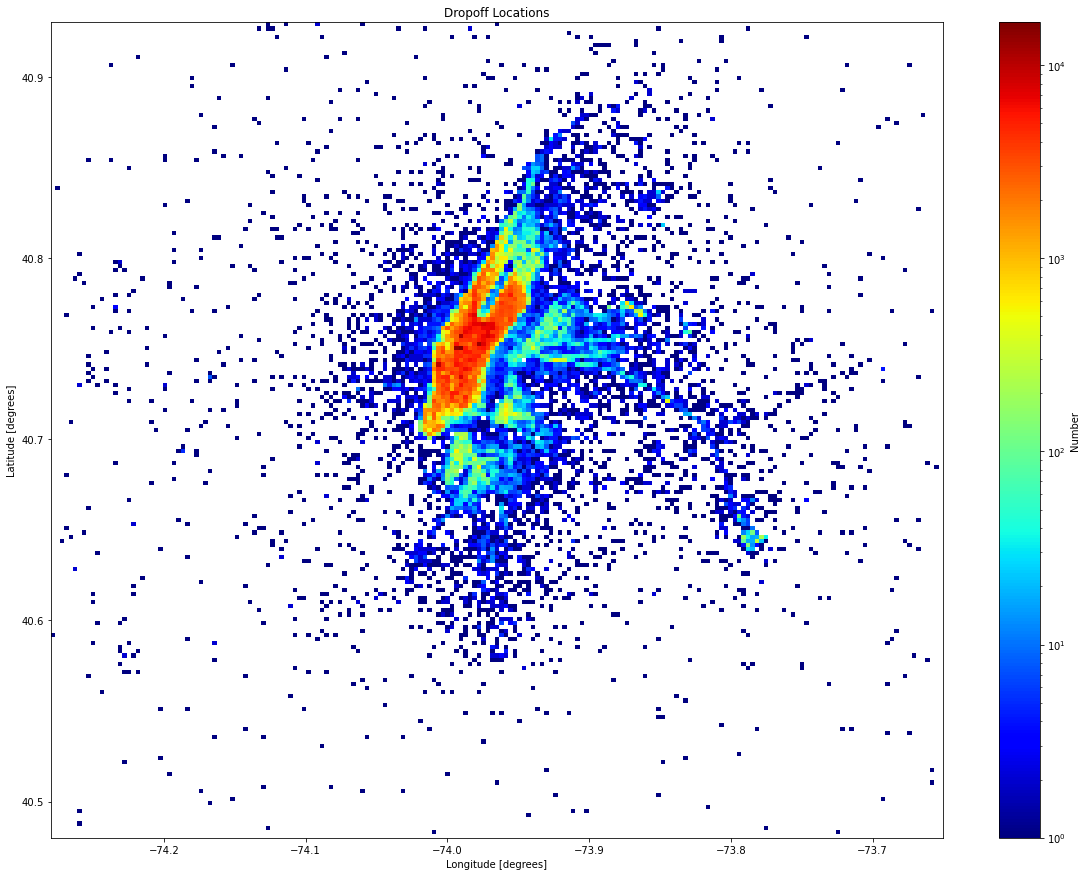

In [12]:
fig = plt.figure(1, figsize=(20,15) )
hist = plt.hist2d(fare10.pickup_longitude,fare10.pickup_latitude,bins=199,range=[[lonmin,lonmax],[latmin,latmax]],norm=LogNorm(),cmap=plt.cm.jet)
plt.xlabel('Longitude [degrees]')
plt.ylabel('Latitude [degrees]')
plt.title('Dropoff Locations')
plt.colorbar(label='Number')
plt.show()

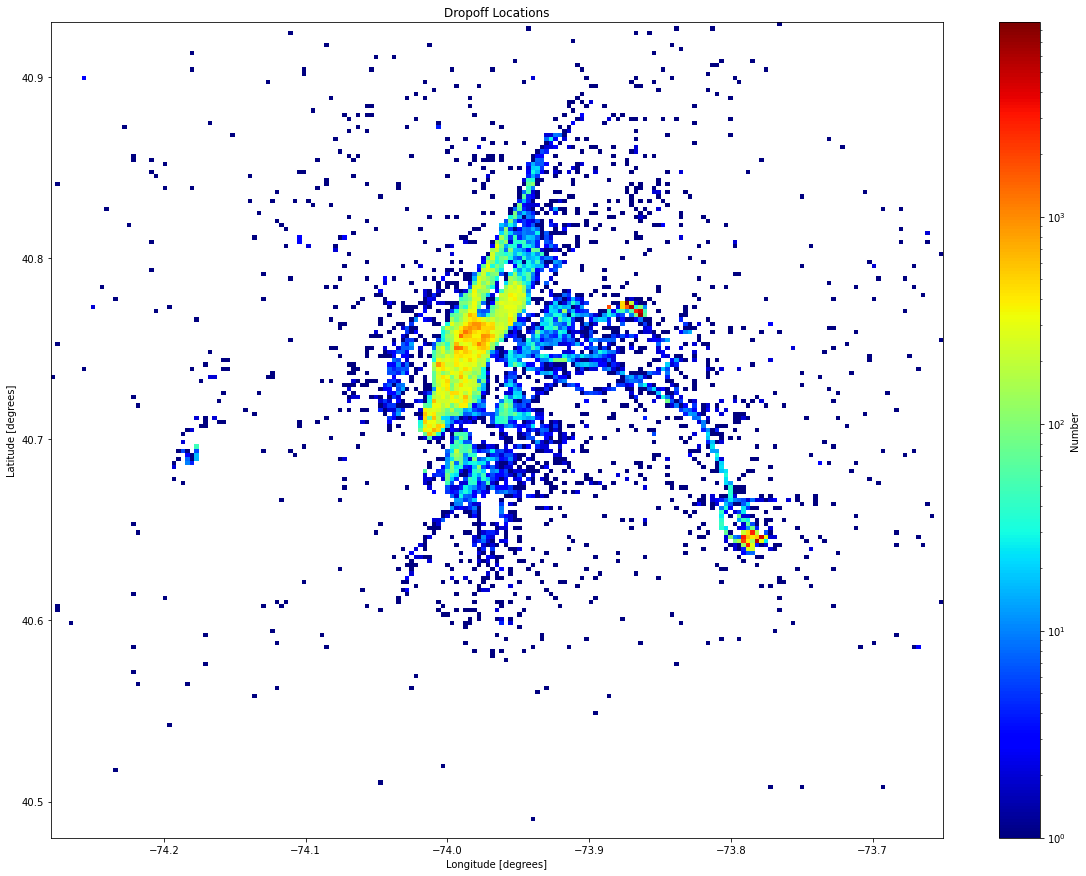

In [13]:
fig = plt.figure(1, figsize=(20,15) )
hist = plt.hist2d(fare20.pickup_longitude,fare20.pickup_latitude,bins=199,range=[[lonmin,lonmax],[latmin,latmax]],norm=LogNorm(),cmap=plt.cm.jet)
plt.xlabel('Longitude [degrees]')
plt.ylabel('Latitude [degrees]')
plt.title('Dropoff Locations')
plt.colorbar(label='Number')
plt.show()

In [14]:
#passenger num distribution
num1=df[df['passenger_count']==1]
num2=df[df['passenger_count']==2]
num3=df[df['passenger_count']==3]
num4=df[df['passenger_count']>4]

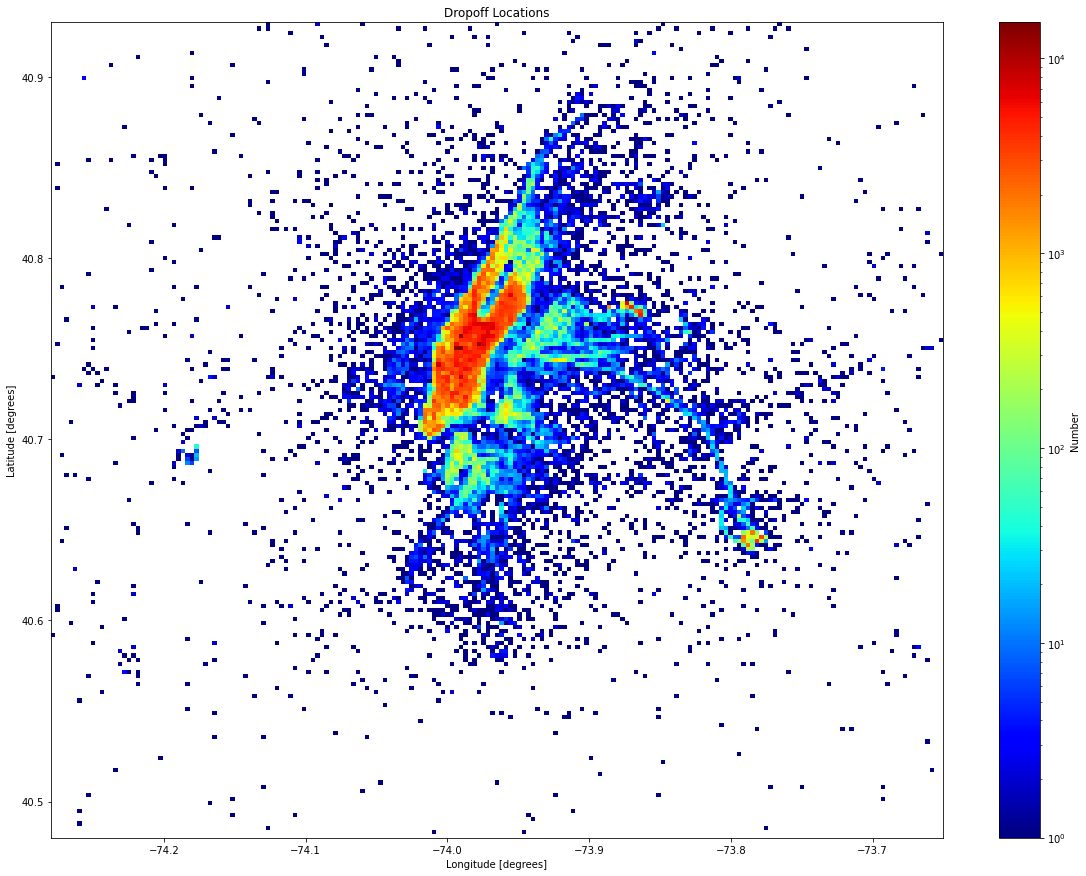

In [15]:
fig = plt.figure(1, figsize=(20,15) )
hist = plt.hist2d(num1.pickup_longitude,num1.pickup_latitude,bins=199,range=[[lonmin,lonmax],[latmin,latmax]],norm=LogNorm(),cmap=plt.cm.jet)
plt.xlabel('Longitude [degrees]')
plt.ylabel('Latitude [degrees]')
plt.title('Dropoff Locations')
plt.colorbar(label='Number')
plt.show()

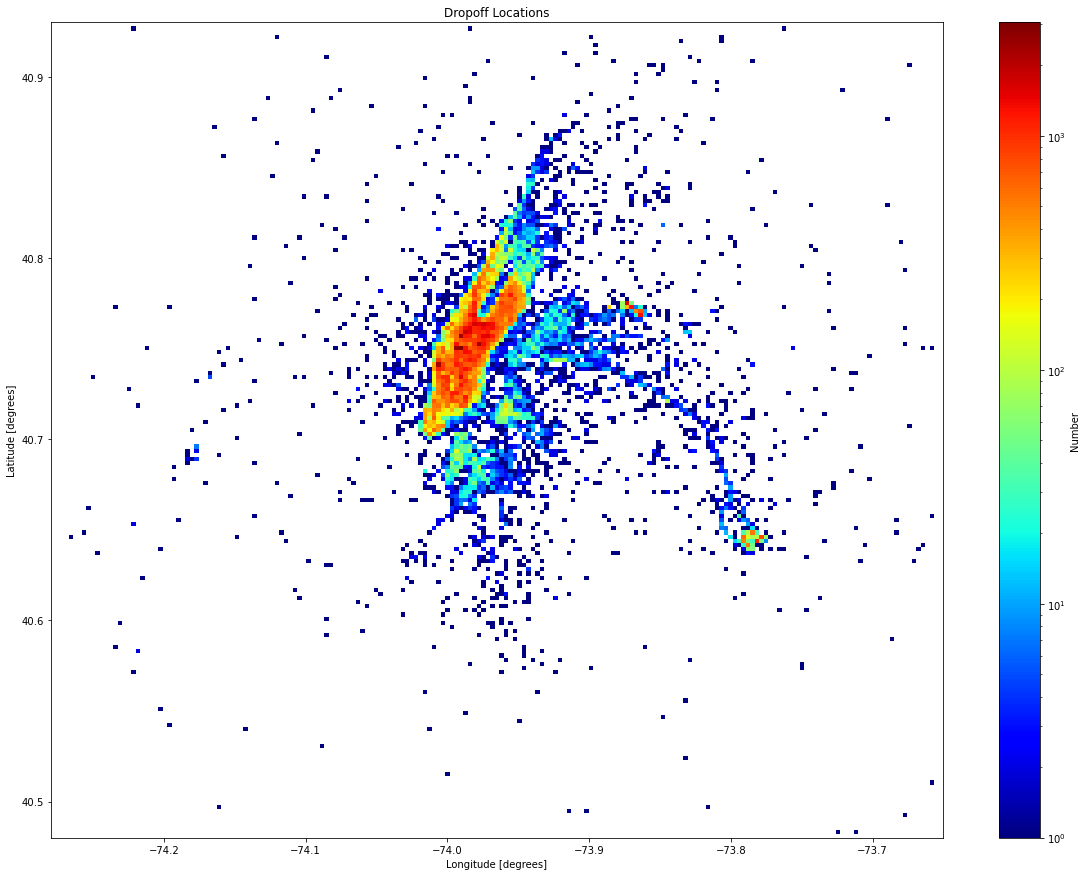

In [16]:
fig = plt.figure(1, figsize=(20,15) )
hist = plt.hist2d(num2.pickup_longitude,num2.pickup_latitude,bins=199,range=[[lonmin,lonmax],[latmin,latmax]],norm=LogNorm(),cmap=plt.cm.jet)
plt.xlabel('Longitude [degrees]')
plt.ylabel('Latitude [degrees]')
plt.title('Dropoff Locations')
plt.colorbar(label='Number')
plt.show()

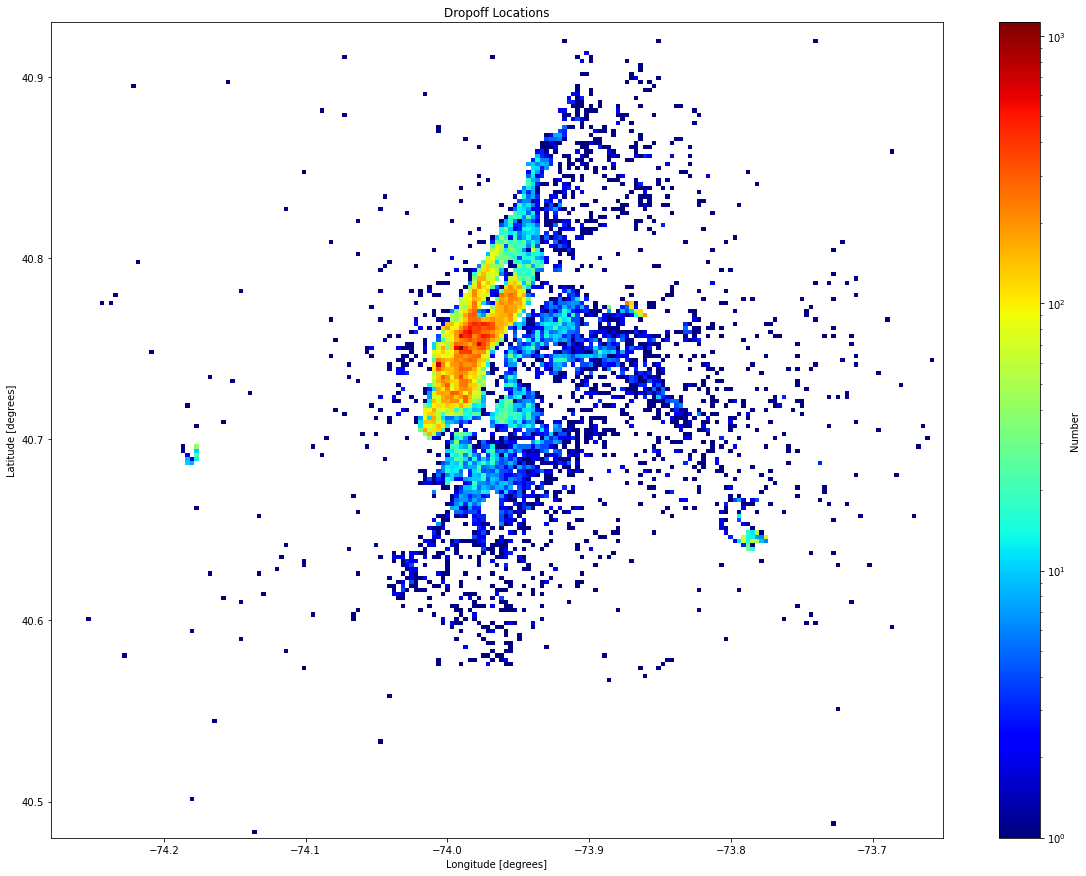

In [17]:
fig = plt.figure(1, figsize=(20,15) )
hist = plt.hist2d(num3.dropoff_longitude,num3.dropoff_latitude,bins=199,range=[[lonmin,lonmax],[latmin,latmax]],norm=LogNorm(),cmap=plt.cm.jet)
plt.xlabel('Longitude [degrees]')
plt.ylabel('Latitude [degrees]')
plt.title('Dropoff Locations')
plt.colorbar(label='Number')
plt.show()

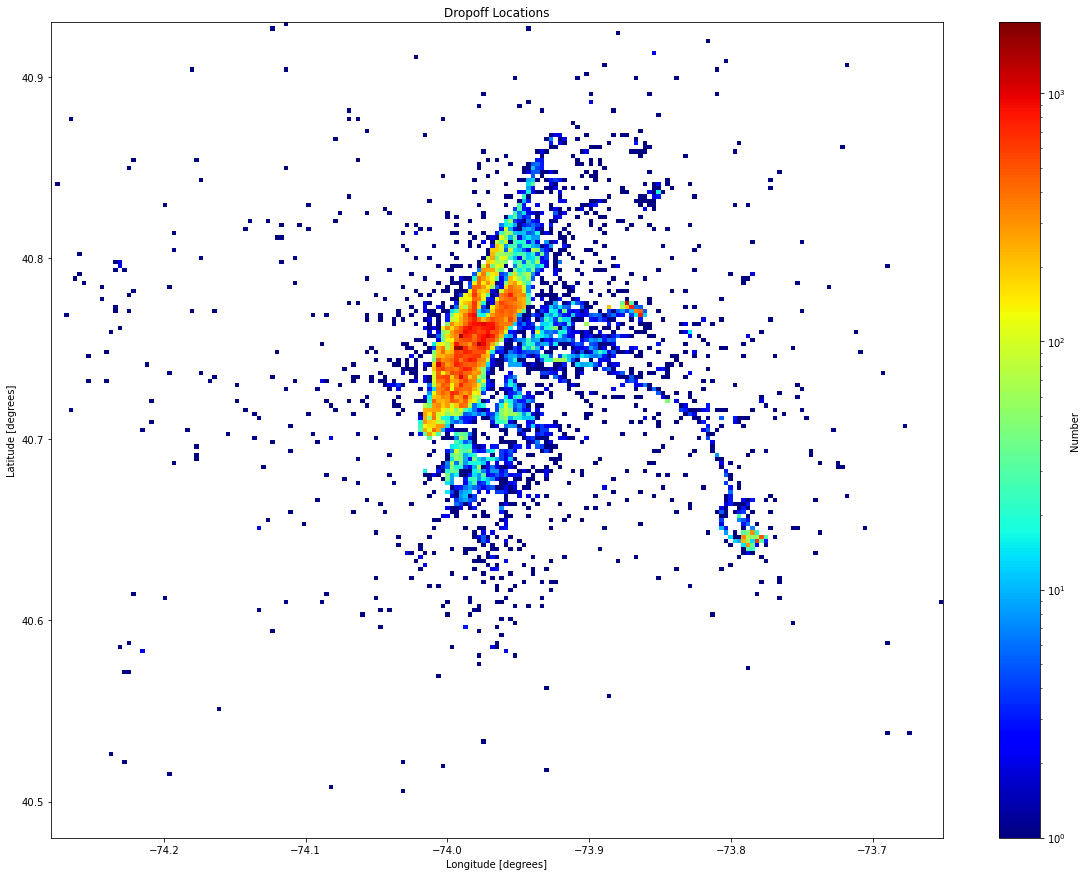

In [18]:
fig = plt.figure(1, figsize=(20,15) )
hist = plt.hist2d(num4.pickup_longitude,num4.pickup_latitude,bins=199,range=[[lonmin,lonmax],[latmin,latmax]],norm=LogNorm(),cmap=plt.cm.jet)
plt.xlabel('Longitude [degrees]')
plt.ylabel('Latitude [degrees]')
plt.title('Dropoff Locations')
plt.colorbar(label='Number')
plt.show()

In [19]:
#weekday and weekend
wkd=df[df['dow']<5]
wed=df[df['dow']>4]

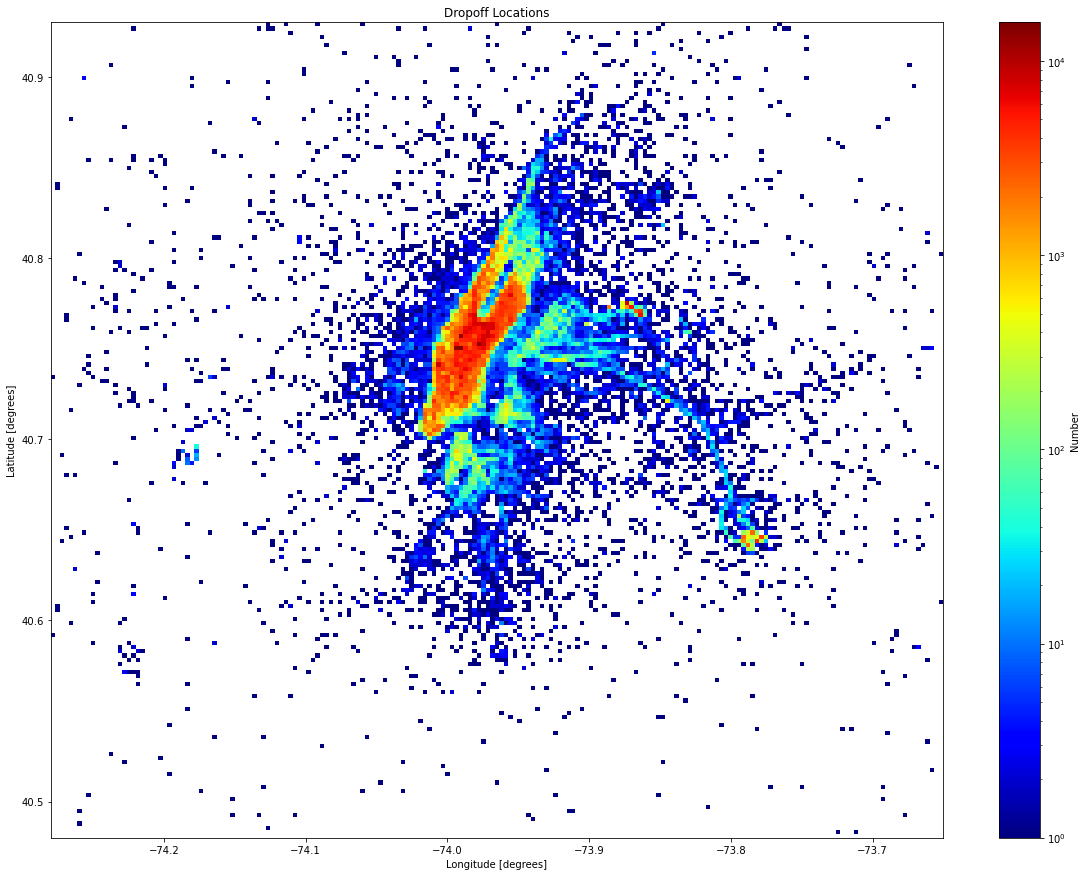

In [20]:
fig = plt.figure(1, figsize=(20,15) )
hist = plt.hist2d(wkd.pickup_longitude,wkd.pickup_latitude,bins=199,range=[[lonmin,lonmax],[latmin,latmax]],norm=LogNorm(),cmap=plt.cm.jet)
plt.xlabel('Longitude [degrees]')
plt.ylabel('Latitude [degrees]')
plt.title('Dropoff Locations')
plt.colorbar(label='Number')
plt.show()

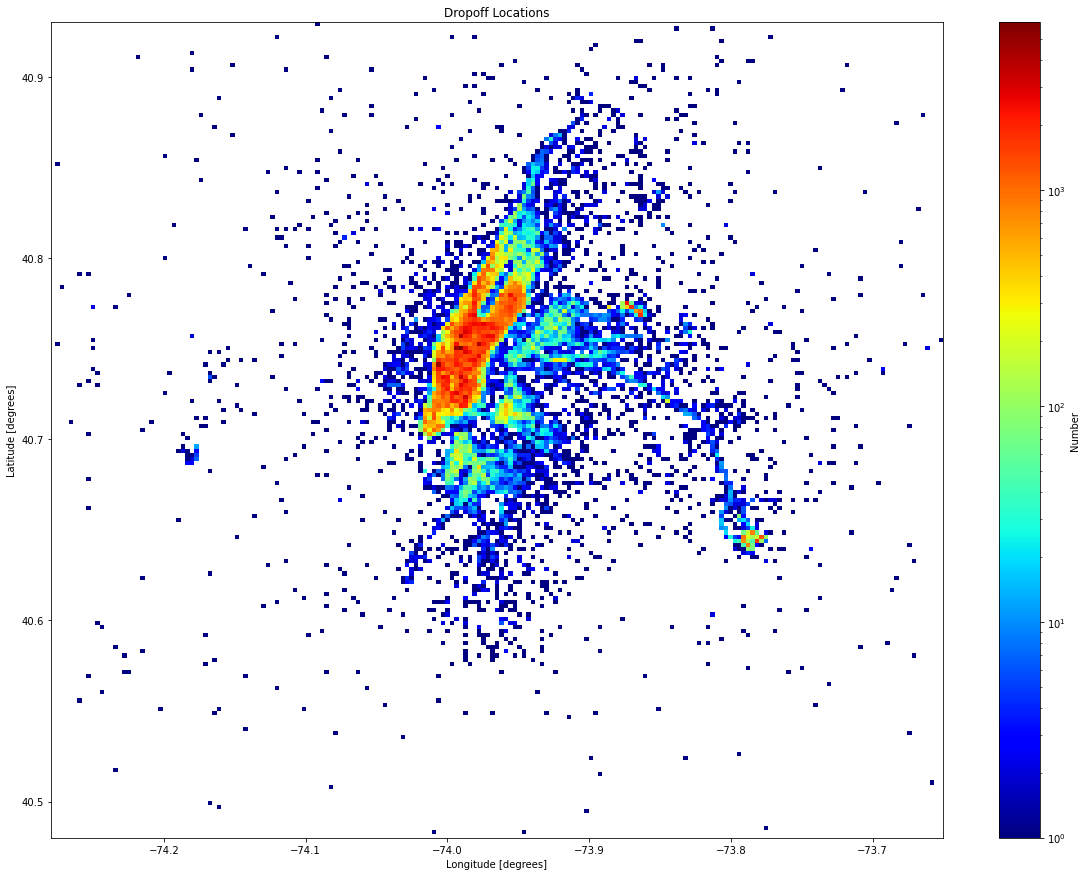

In [21]:
fig = plt.figure(1, figsize=(20,15) )
hist = plt.hist2d(wed.pickup_longitude,wed.pickup_latitude,bins=199,range=[[lonmin,lonmax],[latmin,latmax]],norm=LogNorm(),cmap=plt.cm.jet)
plt.xlabel('Longitude [degrees]')
plt.ylabel('Latitude [degrees]')
plt.title('Dropoff Locations')
plt.colorbar(label='Number')
plt.show()

In [43]:
dfyear=df.groupby(by='year').count()
dfyear.head(10)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
year,,,,,,,,
2009,308652,308652,308652,308652,308652,308652,308652,308652
2010,301338,301338,301338,301338,301338,301338,301338,301338
2011,317959,317959,317959,317959,317959,317959,317959,317959
2012,322580,322580,322580,322580,322580,322580,322580,322580
2013,312544,312544,312544,312544,312544,312544,312544,312544
2014,297372,297372,297372,297372,297372,297372,297372,297372
2015,139541,139541,139541,139541,139541,139541,139541,139541


In [44]:
#choose 2013-2014 for analysis
df1314=df[(df['year']==2013)&(df['year']==2013)]

In [45]:
wea=pd.read_csv('C:/NYU/第二学期/UDS/final/weather1314.csv')

In [46]:
wea.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,new york,2013-01-01,39.5,27.4,36.9,33.6,13.5,29.7,22.4,55.76,...,NaN,NaN,NaN,2013-01-01T07:20:12,2013-01-01T16:39:31,0.58,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72505394728,KEWR,KLGA,72502014734,KNYC,7250301..."
1,new york,2013-01-02,32.7,22.6,27.7,24.2,12.3,19.3,11.2,49.58,...,NaN,NaN,NaN,2013-01-02T07:20:17,2013-01-02T16:40:22,0.62,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72505394728,KEWR,KLGA,72502014734,KNYC,7250301..."
2,new york,2013-01-03,32.6,25.2,29.0,28.6,19.1,22.2,14.6,55.04,...,NaN,NaN,NaN,2013-01-03T07:20:19,2013-01-03T16:41:16,0.67,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72505394728,KEWR,KLGA,72502014734,KNYC,7250301..."
3,new york,2013-01-04,37.4,30.9,34.4,29.3,23.4,26.4,19.3,53.80,...,NaN,NaN,NaN,2013-01-04T07:20:20,2013-01-04T16:42:10,0.72,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72505394728,KEWR,KLGA,72502014734,KNYC,7250301..."
4,new york,2013-01-05,42.9,32.4,36.9,39.8,23.2,31.0,19.1,48.53,...,NaN,NaN,NaN,2013-01-05T07:20:18,2013-01-05T16:43:06,0.77,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"72505394728,KEWR,KLGA,72502014734,KNYC,7250301..."


In [49]:
len(wea)

731

In [47]:
wea.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

In [52]:
wea['snowdepth'].unique()

array([  nan,  1.18,  8.95,  7.52,  5.55,  1.54,  4.4 ,  2.07,  1.97,
        3.15,  3.94,  8.41,  7.87,  7.09,  6.8 ,  8.77,  4.83,  4.04,
        7.98,  6.44, 15.42, 15.31, 14.13, 13.35, 13.7 , 12.16,  9.77,
        9.06,  5.12])

In [53]:
wea['precip'].unique()

array([0.  , 0.45, 0.06, 0.12, 0.71, 0.09, 0.19, 0.07, 0.03, 0.87, 0.01,
       0.02, 0.82, 0.44, 0.48, 0.17, 0.27, 1.4 , 0.15, 0.56, 0.77, 0.08,
       0.51, 0.43, 0.16, 0.24, 0.05, 2.04, 0.59, 0.04, 1.37, 0.25, 0.95,
       3.32, 0.73, 1.  , 0.26, 0.96, 0.41, 0.2 , 0.78, 0.42, 0.14, 0.13,
       0.22, 0.21, 0.11, 0.1 , 0.54, 0.36, 0.5 , 0.72, 0.35, 0.99, 0.23,
       1.89, 0.3 , 0.79, 1.07, 0.31, 0.65, 0.49, 0.38, 1.09, 1.36, 1.35,
       0.28, 1.05, 0.52, 0.76, 3.83, 0.4 , 0.46, 1.04, 0.7 , 0.53, 1.5 ,
       1.19, 1.34, 0.32, 1.16, 0.62, 0.39, 0.29, 0.66, 0.61, 0.34, 1.17,
       1.18, 1.15, 2.2 , 0.18, 0.57])

In [55]:
wea['description'].unique()

array(['Partly cloudy throughout the day.', 'Clearing in the afternoon.',
       'Clear conditions throughout the day.',
       'Partly cloudy throughout the day with late afternoon rain.',
       'Cloudy skies throughout the day with early morning rain.',
       'Cloudy skies throughout the day.',
       'Cloudy skies throughout the day with late afternoon rain.',
       'Cloudy skies throughout the day with rain.',
       'Cloudy skies throughout the day with a chance of rain throughout the day.',
       'Becoming cloudy in the afternoon.',
       'Becoming cloudy in the afternoon with late afternoon rain.',
       'Clear conditions throughout the day with rain clearing later.',
       'Partly cloudy throughout the day with rain.',
       'Partly cloudy throughout the day with rain clearing later.',
       'Partly cloudy throughout the day with early morning rain.',
       'Clearing in the afternoon with early morning rain.',
       'Cloudy skies throughout the day with rain in the m

In [90]:
wea['datetime']=pd.to_datetime(wea['datetime'])
wea['date']=wea['datetime'].dt.date

In [91]:
#select the rainy days, precip>1 and snow days, snowdepth != nan
rain=wea[wea['precip'] > 1]
snow=wea[wea['snowdepth'] > 0]

In [89]:
dfhist=df[(df['fare_amount']<50)&(df['fare_amount']>0)]

Text(0.5, 0, 'fare')

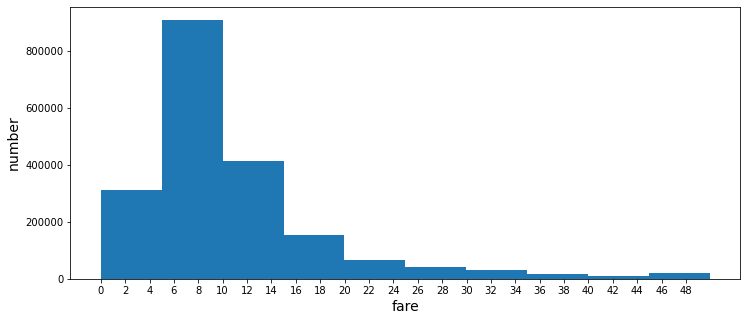

In [92]:
plt.figure(figsize=(12, 5))

plt.hist(dfhist.fare_amount)

plt.xticks(range(0, 50, 2))
plt.ylabel('number', fontsize=14)
plt.xlabel('fare', fontsize=14)

In [95]:
dfrain=dfhist[dfhist['date'].isin(rain['date'])]
dfsnow=dfhist[dfhist['date'].isin(snow['date'])]

Text(0.5, 0, 'fare')

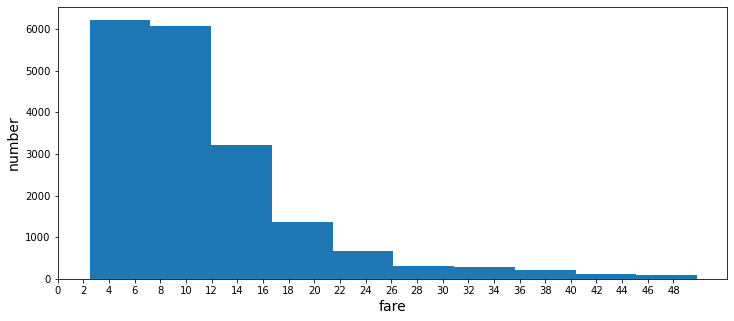

In [96]:
plt.figure(figsize=(12, 5))

plt.hist(dfrain.fare_amount)

plt.xticks(range(0, 50, 2))
plt.ylabel('number', fontsize=14)
plt.xlabel('fare', fontsize=14)

Text(0.5, 0, 'fare')

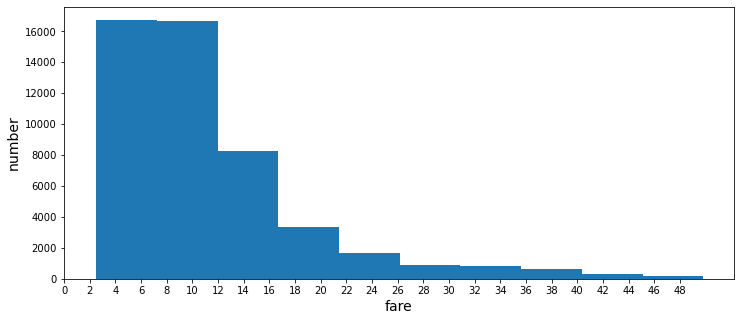

In [97]:
plt.figure(figsize=(12, 5))

plt.hist(dfsnow.fare_amount)

plt.xticks(range(0, 50, 2))
plt.ylabel('number', fontsize=14)
plt.xlabel('fare', fontsize=14)

In [23]:
dir(plt.hist2d)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']